<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

# numpy array olduğundan shape methodunu çalistirabiliyorum.32*32'lik renkli resimler var elimizde.
# 3 channel oldugu icin 3u de gosterdi. Channel eklemeye gerek yok reshape ile.

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

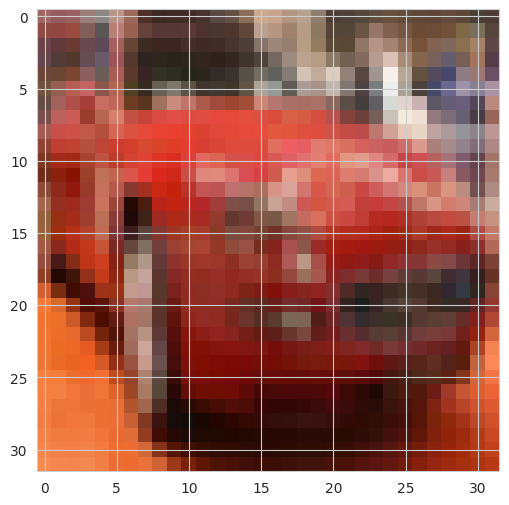

In [7]:
plt.imshow(X_train[5])
plt.show() # zaten renkli oldugu icin cmap'e gerek yok

In [8]:
y_train[5]


array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)
# target da 10 farkli class var
# return_counts value_cpunt gibi saydiran bir parametredir
# train setinde de test setinde de bütün class'lar eşit dağılmış datamız dengeli.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

Keras datasets data dictionaryden labellari alalim:

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# target classlarini numara yeriine direkt labela cevirelim

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
classes[y_train[0][0]]
# indexleme ile classini gorelim

'frog'

In [15]:
classes[int(y_train[0])]  # classes[6]

'frog'

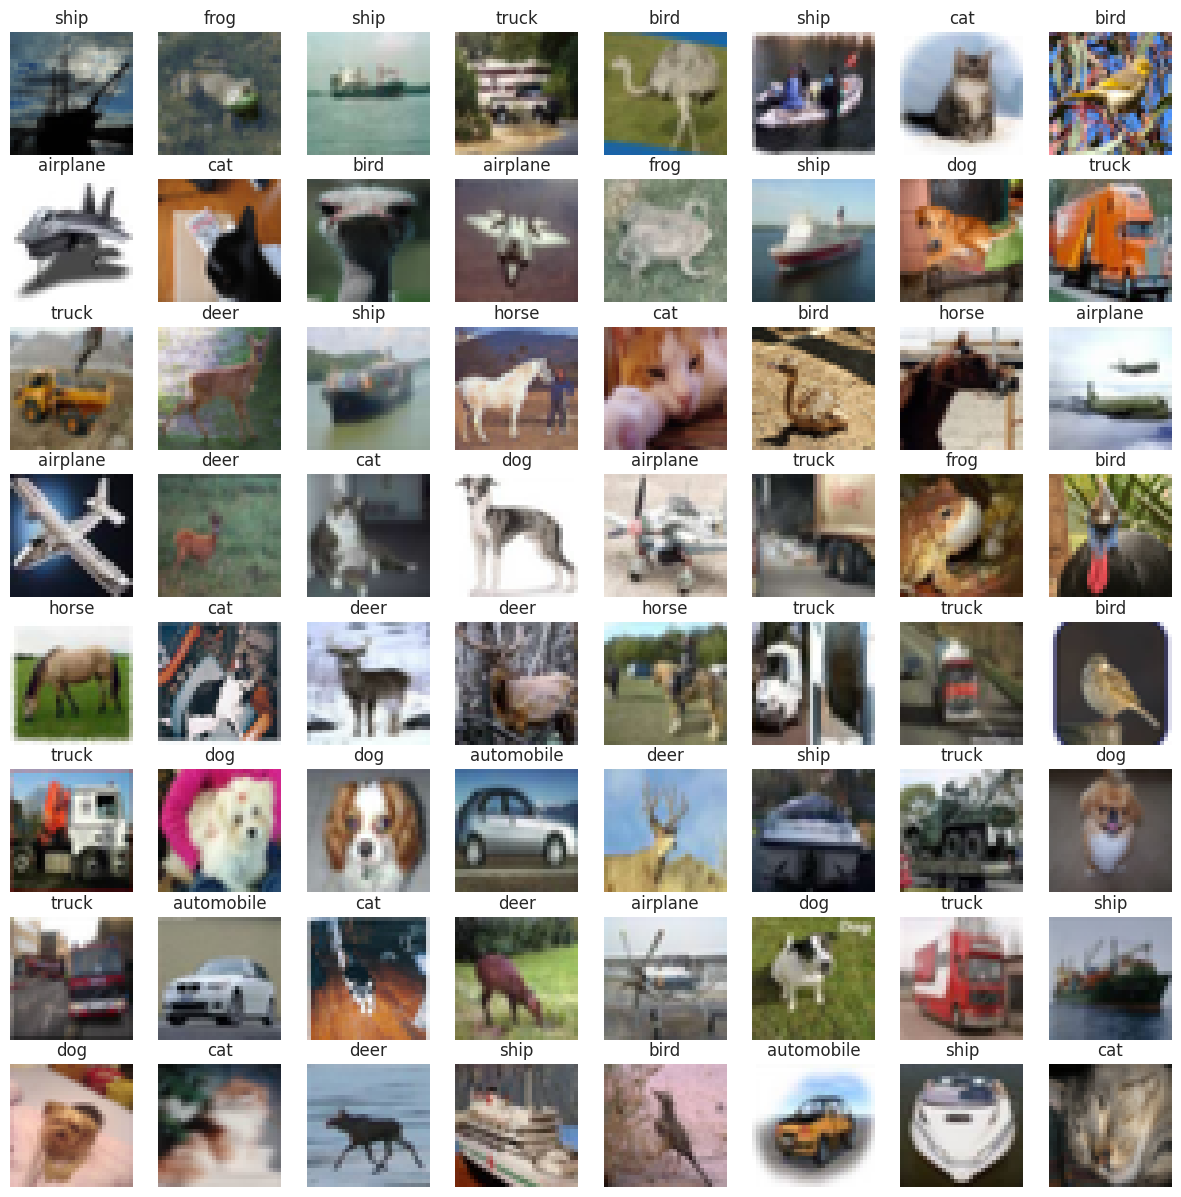

In [16]:
plt.figure(figsize=(15, 15))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [17]:
X_train[5].min()

0

In [18]:
X_train[5].max()
# herhangi bir foto icin bu 252 max. digerlerinde 255 pixeller vardir, bu nedenle her turlu 255le scale etmeli

252

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[5].min()

0.0

In [21]:
X_train[5].max()

0.9882353

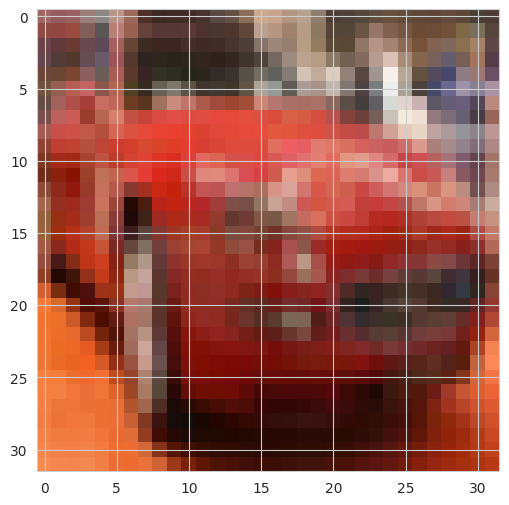

In [22]:
plt.imshow(X_train[5])

In [23]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [27]:
y_train[0]

array([6], dtype=uint8)

In [28]:
Y_train[0]
# softmaxe uygun hale getirdigimiz capital Y artik

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# biz ardisik modellerle calistigimiz icin sequentialla calisiyorz; ilerde sequential olmayanlar icin
# lkerastan functionalAPI ile calisabiliriz

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # multiclass 
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)
# val_loos icin min mode istiyoruz. val_acc izleseydik mode max isterdik

In [34]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 19s 5ms/step - loss: 1.4215 - accuracy: 0.4861 - val_loss: 1.1599 - val_accuracy: 0.5825
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0469 - accuracy: 0.6295 - val_loss: 0.9753 - val_accuracy: 0.6528
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9046 - accuracy: 0.6800 - val_loss: 0.9407 - val_accuracy: 0.6746
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8075 - accuracy: 0.7158 - val_loss: 0.8670 - val_accuracy: 0.6959
Epoch 5/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7263 - accuracy: 0.7417 - val_loss: 0.8745 - val_accuracy: 0.6985
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6623 - accuracy: 0.7668 - val_loss: 0.8529 - val_accuracy: 0.7120
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5911 - accuracy: 0.7909 - val_loss: 0.8945 - val_accuracy

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,1.422,0.486,1.160,0.582
1,1.047,0.629,0.975,0.653
2,0.905,0.680,0.941,0.675
3,0.808,0.716,0.867,0.696
4,0.726,0.742,0.875,0.698
5,0.662,0.767,0.853,0.712
6,0.591,0.791,0.895,0.704


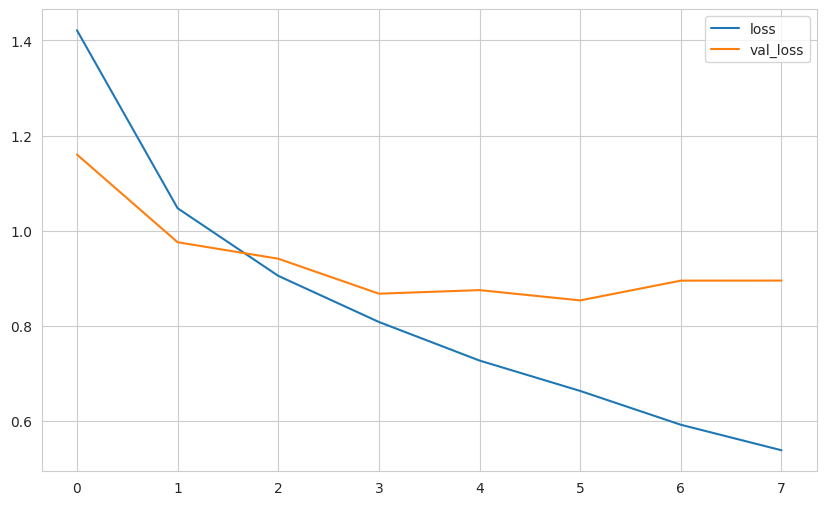

In [37]:
summary[["loss", "val_loss"]].plot();
# patiencei bir de secebilirmisiz, earlystop devreye girdi ama yine de halen overfittinge gitmis

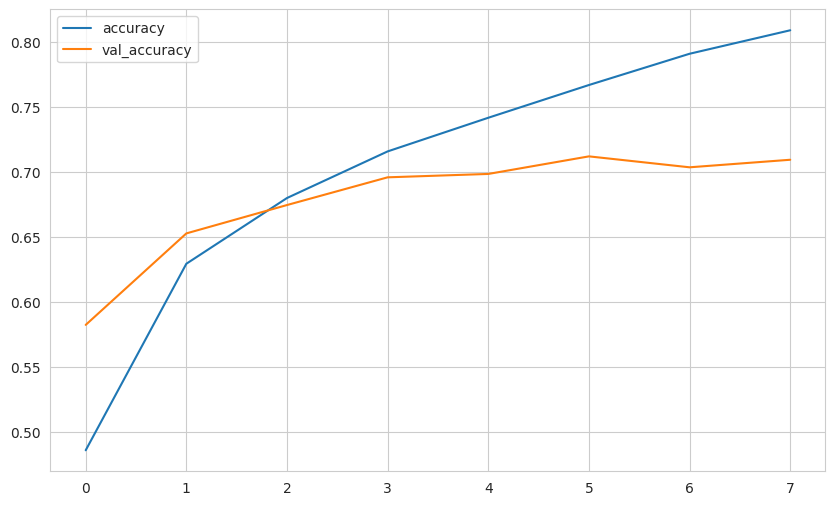

In [38]:
summary[["accuracy", "val_accuracy"]].plot();
# ilk model bize hem kotu skor hem de overfittinge giden bir sonuc verdi, asagida tekrar kuracagiz bu nnedenle
# emin olmak icin yeni model oncesi evaluationla hatalari vs gorelim

# Evaluation on Test Data

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8529 - accuracy: 0.7120


[0.8529224395751953, 0.7120000123977661]

In [41]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# 100 imagedan ancak 71ini bilebiliyor

Test loss: 0.8529224395751953
Test accuracy: 0.7120000123977661


In [42]:
pred_prob = model.predict(X_test)
pred_prob
# yuzde 40larla tahmin ettigi vari yani kotu tahminler

313/313 [==============================] - 1s 3ms/step


array([[0.00018998, 0.00000555, 0.00210649, ..., 0.00033558, 0.00044416,
        0.00001129],
       [0.00115178, 0.3305681 , 0.00000155, ..., 0.00000005, 0.66519046,
        0.00303758],
       [0.12186715, 0.22929332, 0.01232379, ..., 0.0011882 , 0.52209336,
        0.05689402],
       ...,
       [0.00012816, 0.00000026, 0.40789485, ..., 0.03696008, 0.00003639,
        0.00000043],
       [0.02946119, 0.08427748, 0.13390186, ..., 0.00196486, 0.00189238,
        0.00022679],
       [0.00000018, 0.00000017, 0.00002652, ..., 0.9914103 , 0.        ,
        0.00000011]], dtype=float32)

In [43]:
y_pred = np.argmax(pred_prob, axis=1)

In [44]:
y_pred

array([5, 8, 8, ..., 2, 4, 7])

In [45]:
print(classification_report(y_test, y_pred))
# ornegin 3ün recallu 53, 1000 kediden yalnizca 530unu yakalayabilmis; kedileri nelerle karistirdigini 
# asagida conf matrix ve heatmaple gorelim

              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1000
           1       0.81      0.83      0.82      1000
           2       0.62      0.58      0.60      1000
           3       0.50      0.53      0.52      1000
           4       0.68      0.67      0.67      1000
           5       0.57      0.66      0.61      1000
           6       0.78      0.76      0.77      1000
           7       0.77      0.78      0.78      1000
           8       0.82      0.84      0.83      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [46]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [47]:
print(confusion_matrix(y_test, y_pred))

[[723  22  64  27  20  10  10  17  75  32]
 [ 12 826   8  11   1   4  10   6  36  86]
 [ 50   5 579  81  98  72  68  31   6  10]
 [ 16   9  63 532  62 219  47  33   8  11]
 [ 14   1  76  57 666  60  44  68  11   3]
 [  7   4  50 168  42 656  18  43   6   6]
 [  4   4  48  87  38  40 762   6   4   7]
 [ 12   3  29  44  45  64   6 783   9   5]
 [ 48  38  11  21   4  10   6   5 836  21]
 [ 27 110   5  29   3   6  10  21  32 757]]


<Axes: >

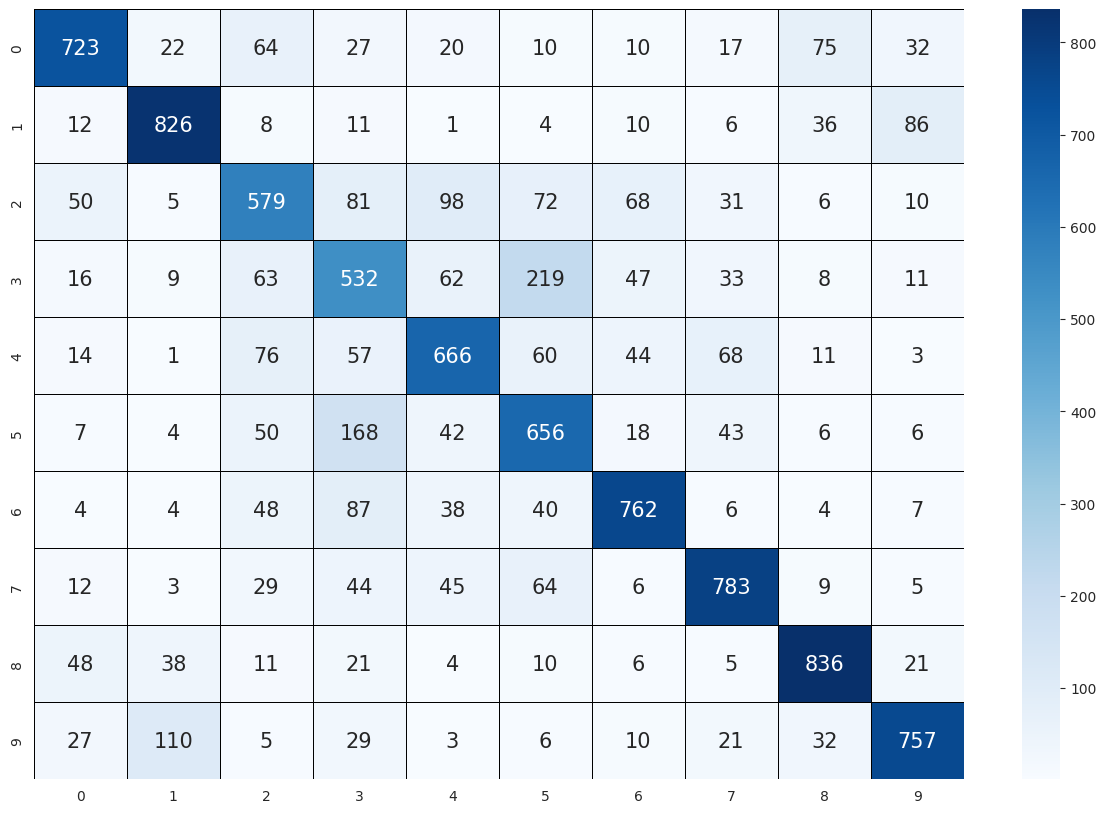

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
# 219 kediye kopek demis
# 110 tanne kamyona otomobil demis

In [49]:
# resimlerin kötü kalitede olması da modelin hatalı tahminler yapmasına neden oldu.modelimin başarısı kötü ve overfittinge 
# gidebiliyor. Daha komplkes; conv layeri daha fazla olan ornegin, bir modelle overfittingi onlemeye calisalim : 

# Modelling-2

In [98]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
# Conv2D'den sonra illa pooling layer gelecek diye bir zorunluluk yoktur. bu sekildeki gibi 2. bir conv layer da olabilir

model.add(MaxPool2D((2,2))) # poolingin ogrenmeye olumsuz bir etkisi yok, bu nedenle kaldirmaya gerek olmayabilir, ama yine dolayli
# acidan da bilgi kaybina neden oluyor. Hiz kazanmamizi saglar pooling. bu ornekte kaldirip denedigimizde de skorlara etkisi olmadi.

model.add(Dropout(0.4)) # dropout to avoid overftting
    

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu')) # an extra conv layer

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [99]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [100]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])
# 11de durdu, yani 9 en iyisi.
# 2. calistirmada 13te durdu 11 en iyisi

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.4572 - accuracy: 0.4680 - val_loss: 1.0932 - val_accuracy: 0.6169
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0568 - accuracy: 0.6236 - val_loss: 0.9378 - val_accuracy: 0.6763
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9126 - accuracy: 0.6785 - val_loss: 0.8548 - val_accuracy: 0.7050
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8208 - accuracy: 0.7118 - val_loss: 0.8215 - val_accuracy: 0.7181
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7543 - accuracy: 0.7347 - val_loss: 0.7731 - val_accuracy: 0.7320
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7060 - accuracy: 0.7502 - val_loss: 0.7298 - val_accuracy: 0.7481
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6630 - accuracy: 0.7671 - val_loss: 0.7642 - val_ac

In [101]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.457,0.468,1.093,0.617
1,1.057,0.624,0.938,0.676
2,0.913,0.678,0.855,0.705
3,0.821,0.712,0.821,0.718
4,0.754,0.735,0.773,0.732
5,0.706,0.750,0.730,0.748
6,0.663,0.767,0.764,0.735
7,0.626,0.781,0.704,0.762
8,0.595,0.789,0.681,0.767
9,0.567,0.800,0.698,0.762


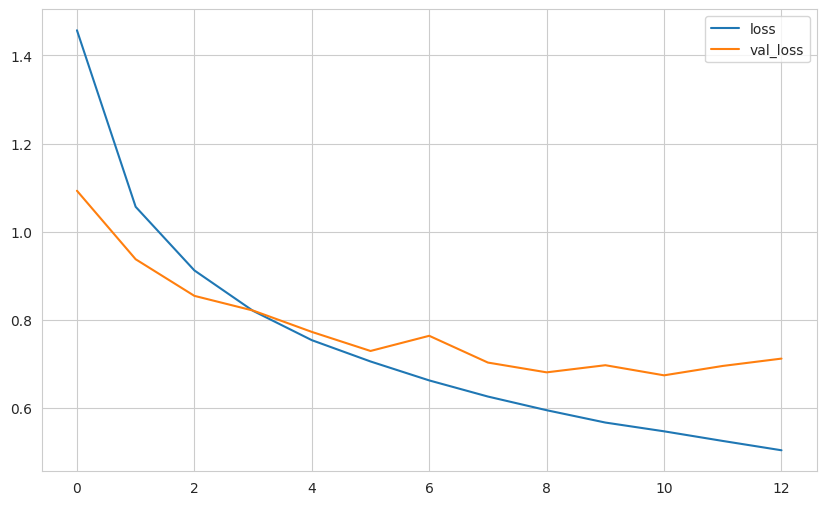

In [102]:
summary[["loss", "val_loss"]].plot();
# overfittin biraz engellenmis. 

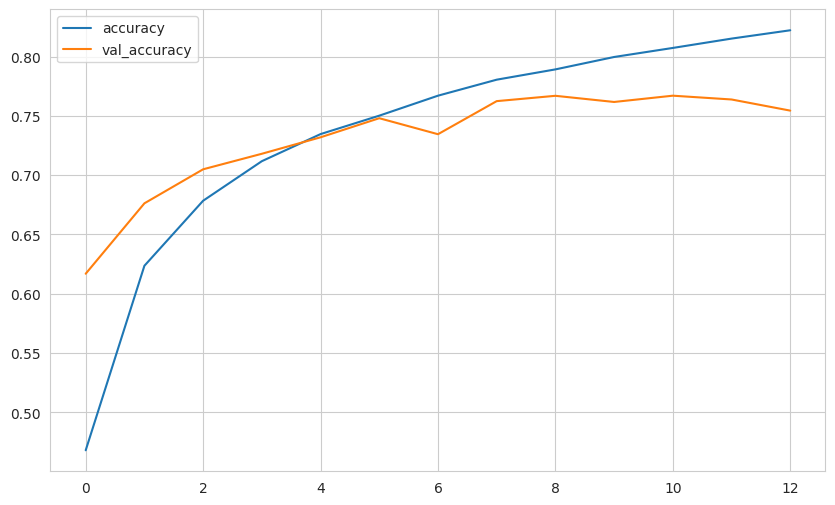

In [103]:
summary[["accuracy", "val_accuracy"]].plot();
# acc skorlari da artti. dropout etkili olmus

# Evaluation on Test Data

In [104]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6746 - accuracy: 0.7671


[0.6745760440826416, 0.7670999765396118]

In [105]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6745760440826416
Test accuracy: 0.7670999765396118


In [106]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [107]:
y_pred = np.argmax(pred_prob, axis=1)

In [108]:
y_pred

array([5, 8, 8, ..., 5, 0, 7])

In [109]:
print(classification_report(y_test, y_pred))
# seed uygulamadigimiz icin weights rastgele atandi. skorlar iyilesmesine ragmen ornegin kedileri yakalama orani 0.53ten 
# 0.50ye dustu
# ikinci kez runne dince 0.54 oldu

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.85      0.87      0.86      1000
           2       0.74      0.61      0.67      1000
           3       0.59      0.54      0.57      1000
           4       0.72      0.77      0.74      1000
           5       0.68      0.66      0.67      1000
           6       0.79      0.85      0.82      1000
           7       0.82      0.81      0.82      1000
           8       0.86      0.87      0.87      1000
           9       0.84      0.85      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.76      0.77      0.76     10000
weighted avg       0.76      0.77      0.76     10000



<Axes: >

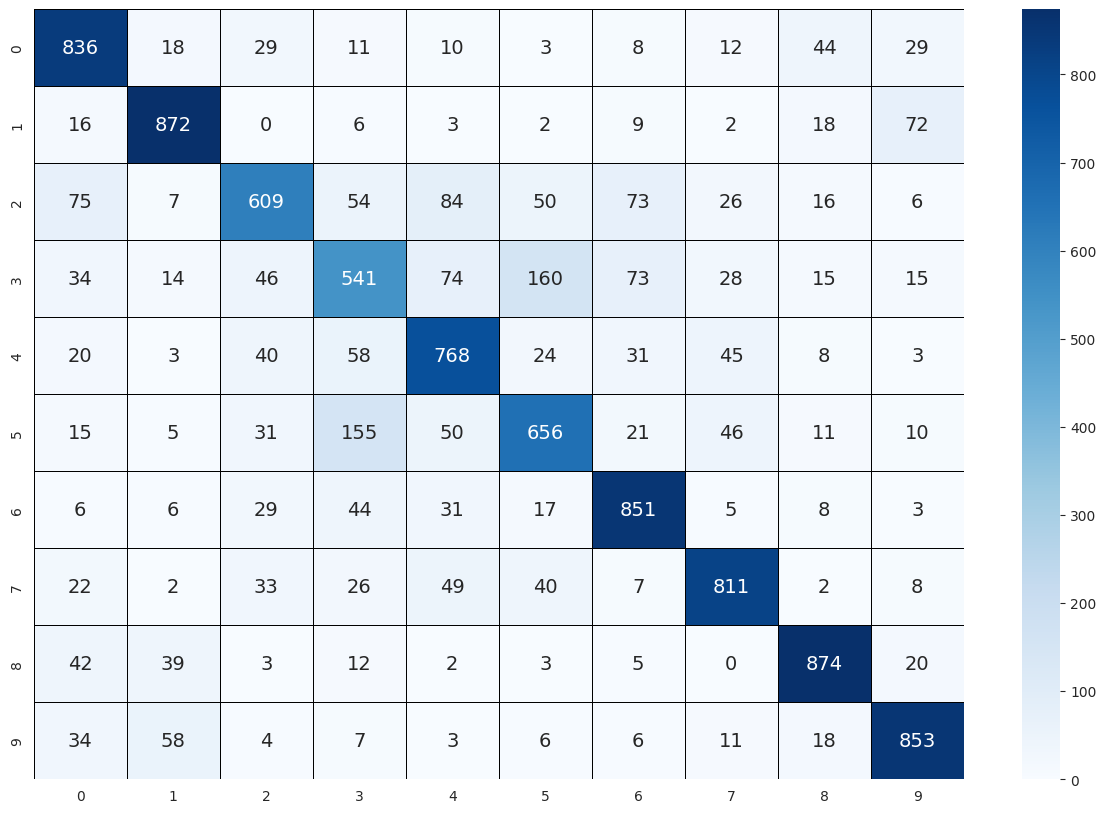

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [64]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [65]:
from tensorflow.keras.layers import BatchNormalization

# BatchNormalization bir regularization tekniğidir ANN yapılarında da kullanılabilir.Ama özellikle CNN mimarilerinde 
# daha iyi performans gösterdiği gözlemlenmiş.

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [66]:
model = Sequential()

# to set a more complexed model (better learner), more conv layers will be added; to avoid overfitting as the number of 
# features increase, we'll also add batchnor layers and dropout
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization()) # Batchnor is lso added as a layer
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization()) # we can also add batchnor layers in ANN part
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# yukardaki mdodellerde summary en altinda non-trainabel parametreler 0'di. Ama
# batchnor kullandigimizda buradaki beta ve gammalar hep guncellenir ve non-trainable par.ler olusur

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [68]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [69]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 36s 17ms/step - loss: 1.9532 - accuracy: 0.2984 - val_loss: 1.5259 - val_accuracy: 0.4233
Epoch 2/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4847 - accuracy: 0.4583 - val_loss: 1.2525 - val_accuracy: 0.5580
Epoch 3/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2601 - accuracy: 0.5601 - val_loss: 1.0346 - val_accuracy: 0.6345
Epoch 4/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1072 - accuracy: 0.6246 - val_loss: 0.8767 - val_accuracy: 0.6934
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0204 - accuracy: 0.6600 - val_loss: 0.9136 - val_accuracy: 0.6892
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9408 - accuracy: 0.6862 - val_loss: 0.8689 - val_accuracy: 0.7113
Epoch 7/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8888 - accuracy: 0.7064 - val_loss: 0.7876 -

In [70]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
6,0.889,0.706,0.788,0.727
7,0.836,0.726,0.789,0.730
8,0.799,0.740,0.663,0.774
9,0.772,0.748,0.729,0.759
10,0.743,0.758,0.712,0.767


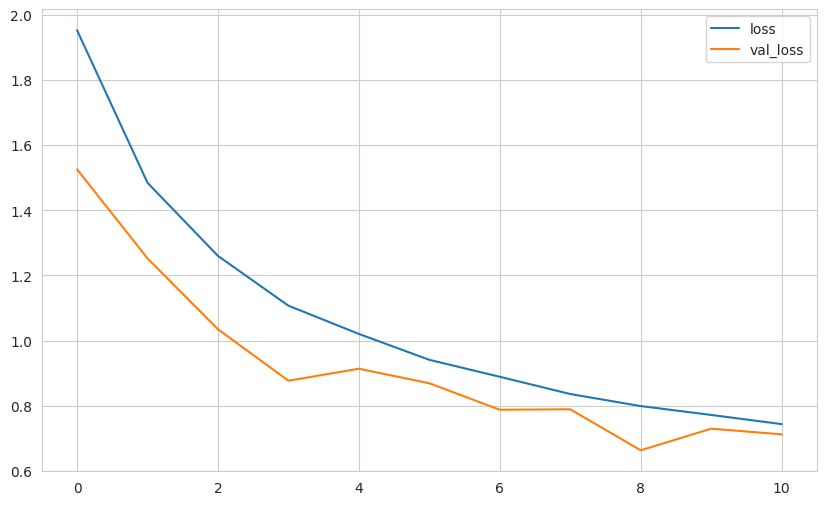

In [71]:
summary[["loss", "val_loss"]].plot();
# overftiitng engellenmis, skorlar biraz artmis

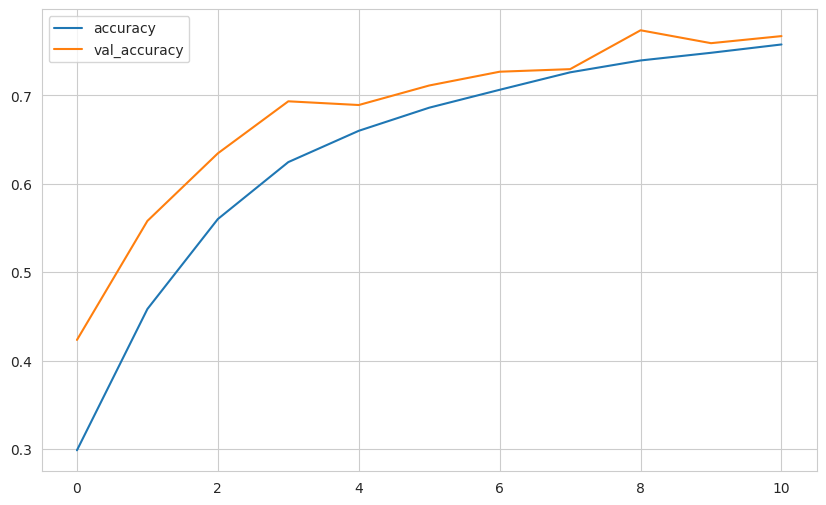

In [72]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [73]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6630 - accuracy: 0.7738


[0.6630293130874634, 0.7738000154495239]

In [74]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6630293130874634
Test accuracy: 0.7738000154495239


In [75]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [76]:
y_pred = np.argmax(pred_prob, axis=1)

In [77]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [78]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1000
           1       0.95      0.86      0.90      1000
           2       0.59      0.75      0.66      1000
           3       0.69      0.53      0.60      1000
           4       0.69      0.83      0.75      1000
           5       0.75      0.60      0.67      1000
           6       0.72      0.90      0.80      1000
           7       0.91      0.77      0.83      1000
           8       0.83      0.92      0.87      1000
           9       0.82      0.93      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



<Axes: >

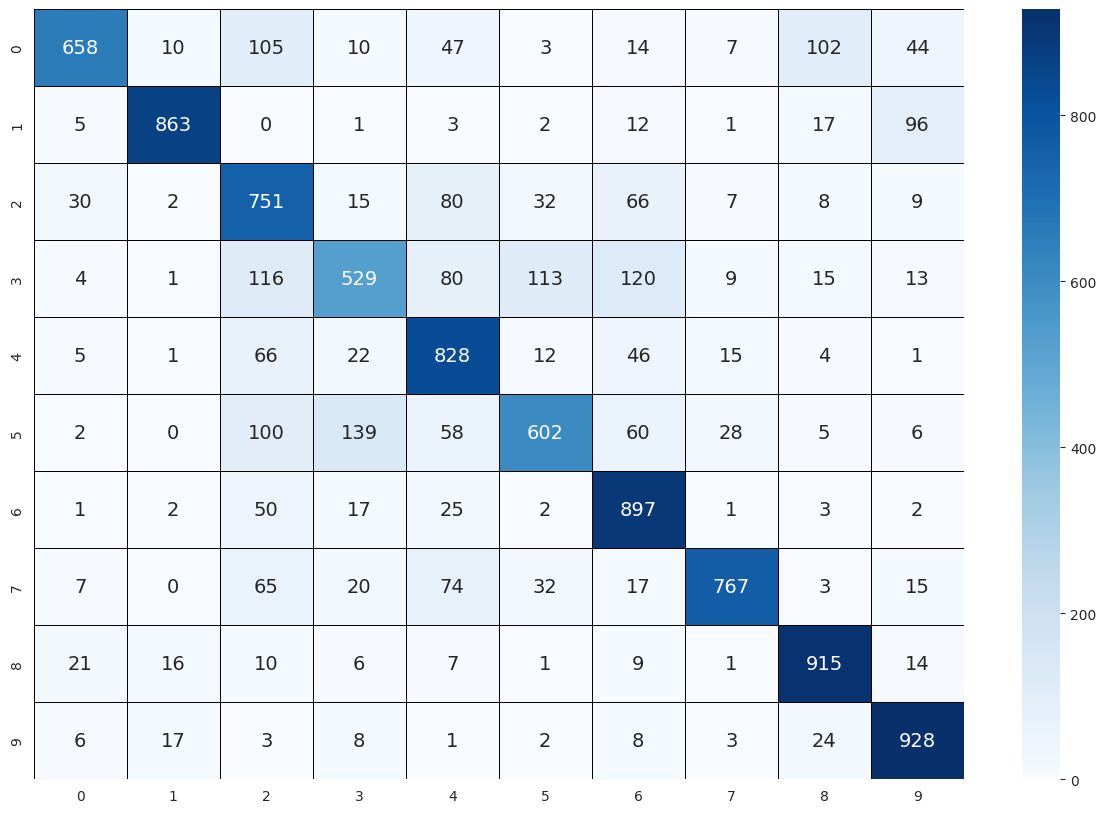

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [81]:
my_image = X_test[44]

In [82]:
my_image.shape

(32, 32, 3)

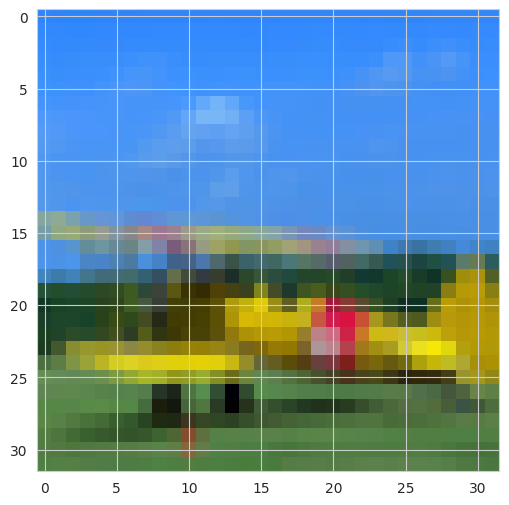

In [83]:
plt.imshow(my_image)

In [84]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 288ms/step


In [85]:
image_prediction

array([[0.99260676, 0.00021796, 0.00149395, 0.00011266, 0.00044011,
        0.00003555, 0.00004138, 0.00020677, 0.00355859, 0.00128621]],
      dtype=float32)

In [86]:
np.argmax(image_prediction, axis=1)

array([0])

In [87]:
result=np.argmax(image_prediction, axis=1)

In [88]:
result

array([0])

In [89]:
classes[int(result)]

'airplane'

In [90]:
model.save("cnn-1.h5")

## Load the Saved Model and Get Predictions

In [91]:
model = tf.keras.models.load_model('cnn-1.h5')

In [92]:
X_test[15].shape

(32, 32, 3)

In [93]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [94]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

1/1 [==============================] - 0s 214ms/step


In [95]:
np.argmax(pred)

8

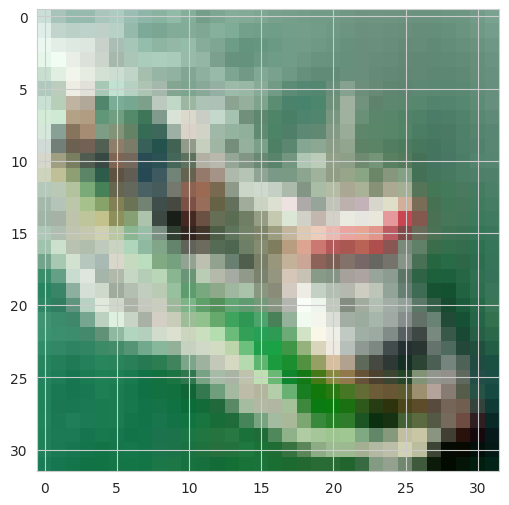

In [96]:
plt.imshow(X_test[15])

In [97]:
classes[8]

'ship'